In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('MNIST_dataset/train.csv')

data = np.array(data)
x = data[:, 1:].T
y = data[:, 0]
print(f"x_shape = {x.shape}")
print(f"y_shape = {y.shape}")

x_shape = (784, 42000)
y_shape = (42000,)


Vamos a crear una red neuronal con la siguiente estructura: (784 x 12 x 12 x 10)

![waterfall](nn.png)

Functions

In [2]:
def ReLU(x):
    return np.maximum(0, x)

# Derivada de la función ReLU para arrays de numpy
def deriv_ReLU(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función Sigmoide
def deriv_sigmoid(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def MSE(y, a_2):
    return np.sum((a_2 - y)**2)

Cambiamos el output deseado de número a vector con 1 en el correcto y 0 en el resto

In [3]:
def one_hot_encode(number, num_classes = 10):
    # Crear un vector de ceros de longitud igual al número de clases
    one_hot = np.zeros(num_classes)
    # Colocar un 1 en la posición correspondiente al número
    one_hot[number] = 1
    return one_hot
y = np.array([one_hot_encode(num) for num in y]).T


In [4]:
W1 = np.random.randn(12, 784)
W2 = np.random.randn(12, 12)
W3 = np.random.randn(10,12)
b1 = np.random.randn(12,)
b2 = np.random.randn(12,)
b3 = np.random.randn(10,)

In [5]:
# 56 minutos !!!!!!!! ( Muy lento, se puede optimizar mucho aún)
learning_rate = 0.0001
costs = []
iterations = [i for i in range(10000)]
for _ in iterations:
    # forward propagation
    Z1 = np.dot(W1,x) + b1[:, np.newaxis]
    A1 = ReLU(Z1)
    Z2 = np.dot(W2,A1) + b2[:, np.newaxis]
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3,A2) + b3[:, np.newaxis]
    A3 = sigmoid(Z3)
    costs.append(MSE(y, A3))
    # Backpropagation
    delta3 = -(y - A3) * deriv_sigmoid(Z3)
    delta2 = np.dot(W3.T, delta3) * deriv_sigmoid(Z2)
    delta1 = np.dot(W2.T, delta2) * deriv_ReLU(Z1)

    W3 -= learning_rate * np.dot(delta3, A2.T)
    b3 -= learning_rate * np.sum(delta3)
    W2 -= learning_rate * np.dot(delta2, A1.T)
    b2 -= learning_rate * np.sum(delta2)
    W1 -= learning_rate * np.dot(delta1, x.T)
    b1 -= learning_rate * np.sum(delta1)


/tmp/ipykernel_63261/1140663413.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


KeyboardInterrupt: 

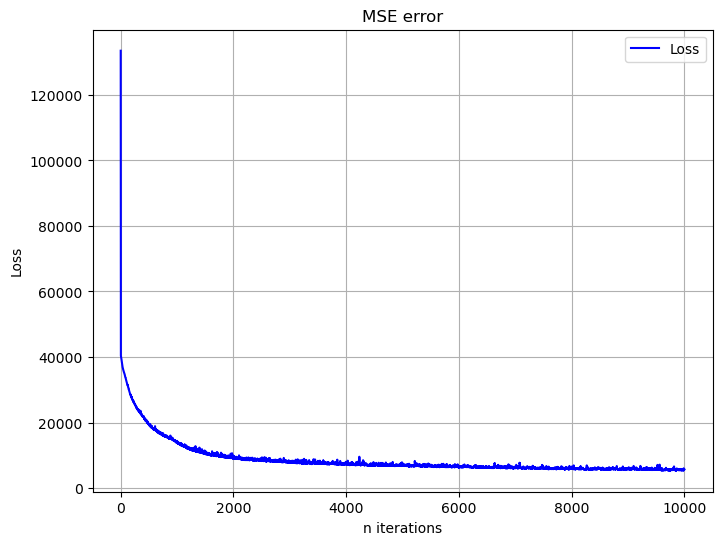

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(iterations, costs, label='Loss', color='blue')
plt.title('MSE error')
plt.xlabel('n iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [ ]:
print(MSE(y, A3))


predictions = np.argmax(A3, axis=0)
real = np.argmax(y, axis=0)
correct = 0
error = 0
for i in range(len(predictions)):
    if predictions[i] == real[i]:
        correct+=1
    else:
        error+=1
print(f"correct = {correct}")
print(f"errors = {error}")
print(f"Accuracy = {correct / len(predictions)}")


5710.242014935678
correct = 38531
errors = 3469
Accuracy = 0.917404761904762
